In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gas = pd.read_csv("D:\\ExcelR\\Assigments\\Neural_Networks\gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas.shape

(15039, 11)

In [4]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:>

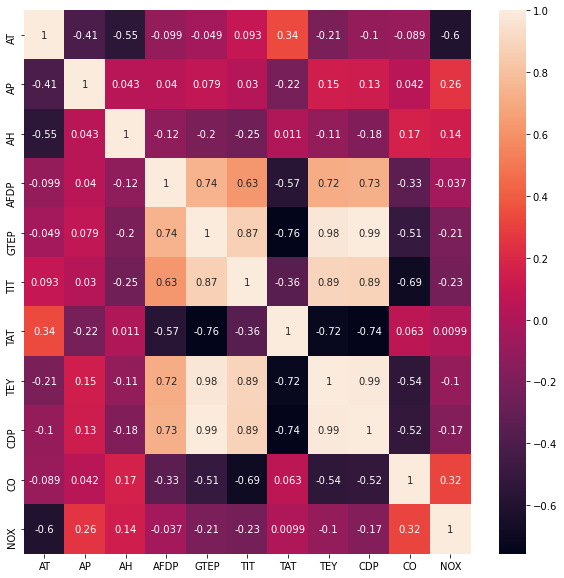

In [6]:
corr = gas.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


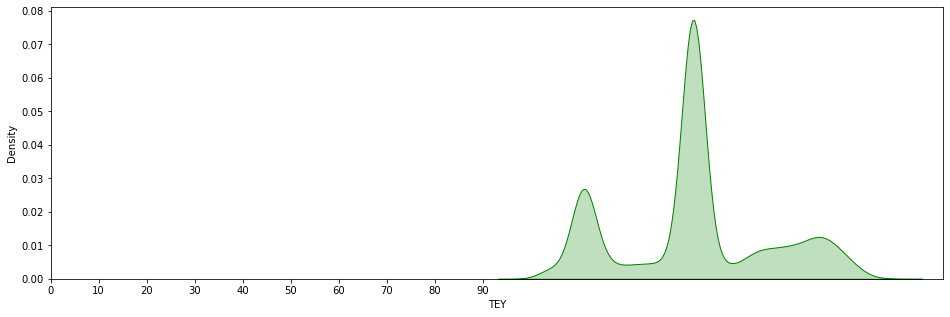

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(gas['TEY'].skew()))
print("Kurtosis: {}".format(gas['TEY'].kurtosis()))
ax = sns.kdeplot(gas['TEY'],shade=True,color='g')
plt.xticks([i for i in range(0,100,10)])
plt.show()

In [11]:
num_columns = gas.select_dtypes(exclude='object').columns.tolist()

<ipython-input-12-7a8852b25d67>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,4,i)


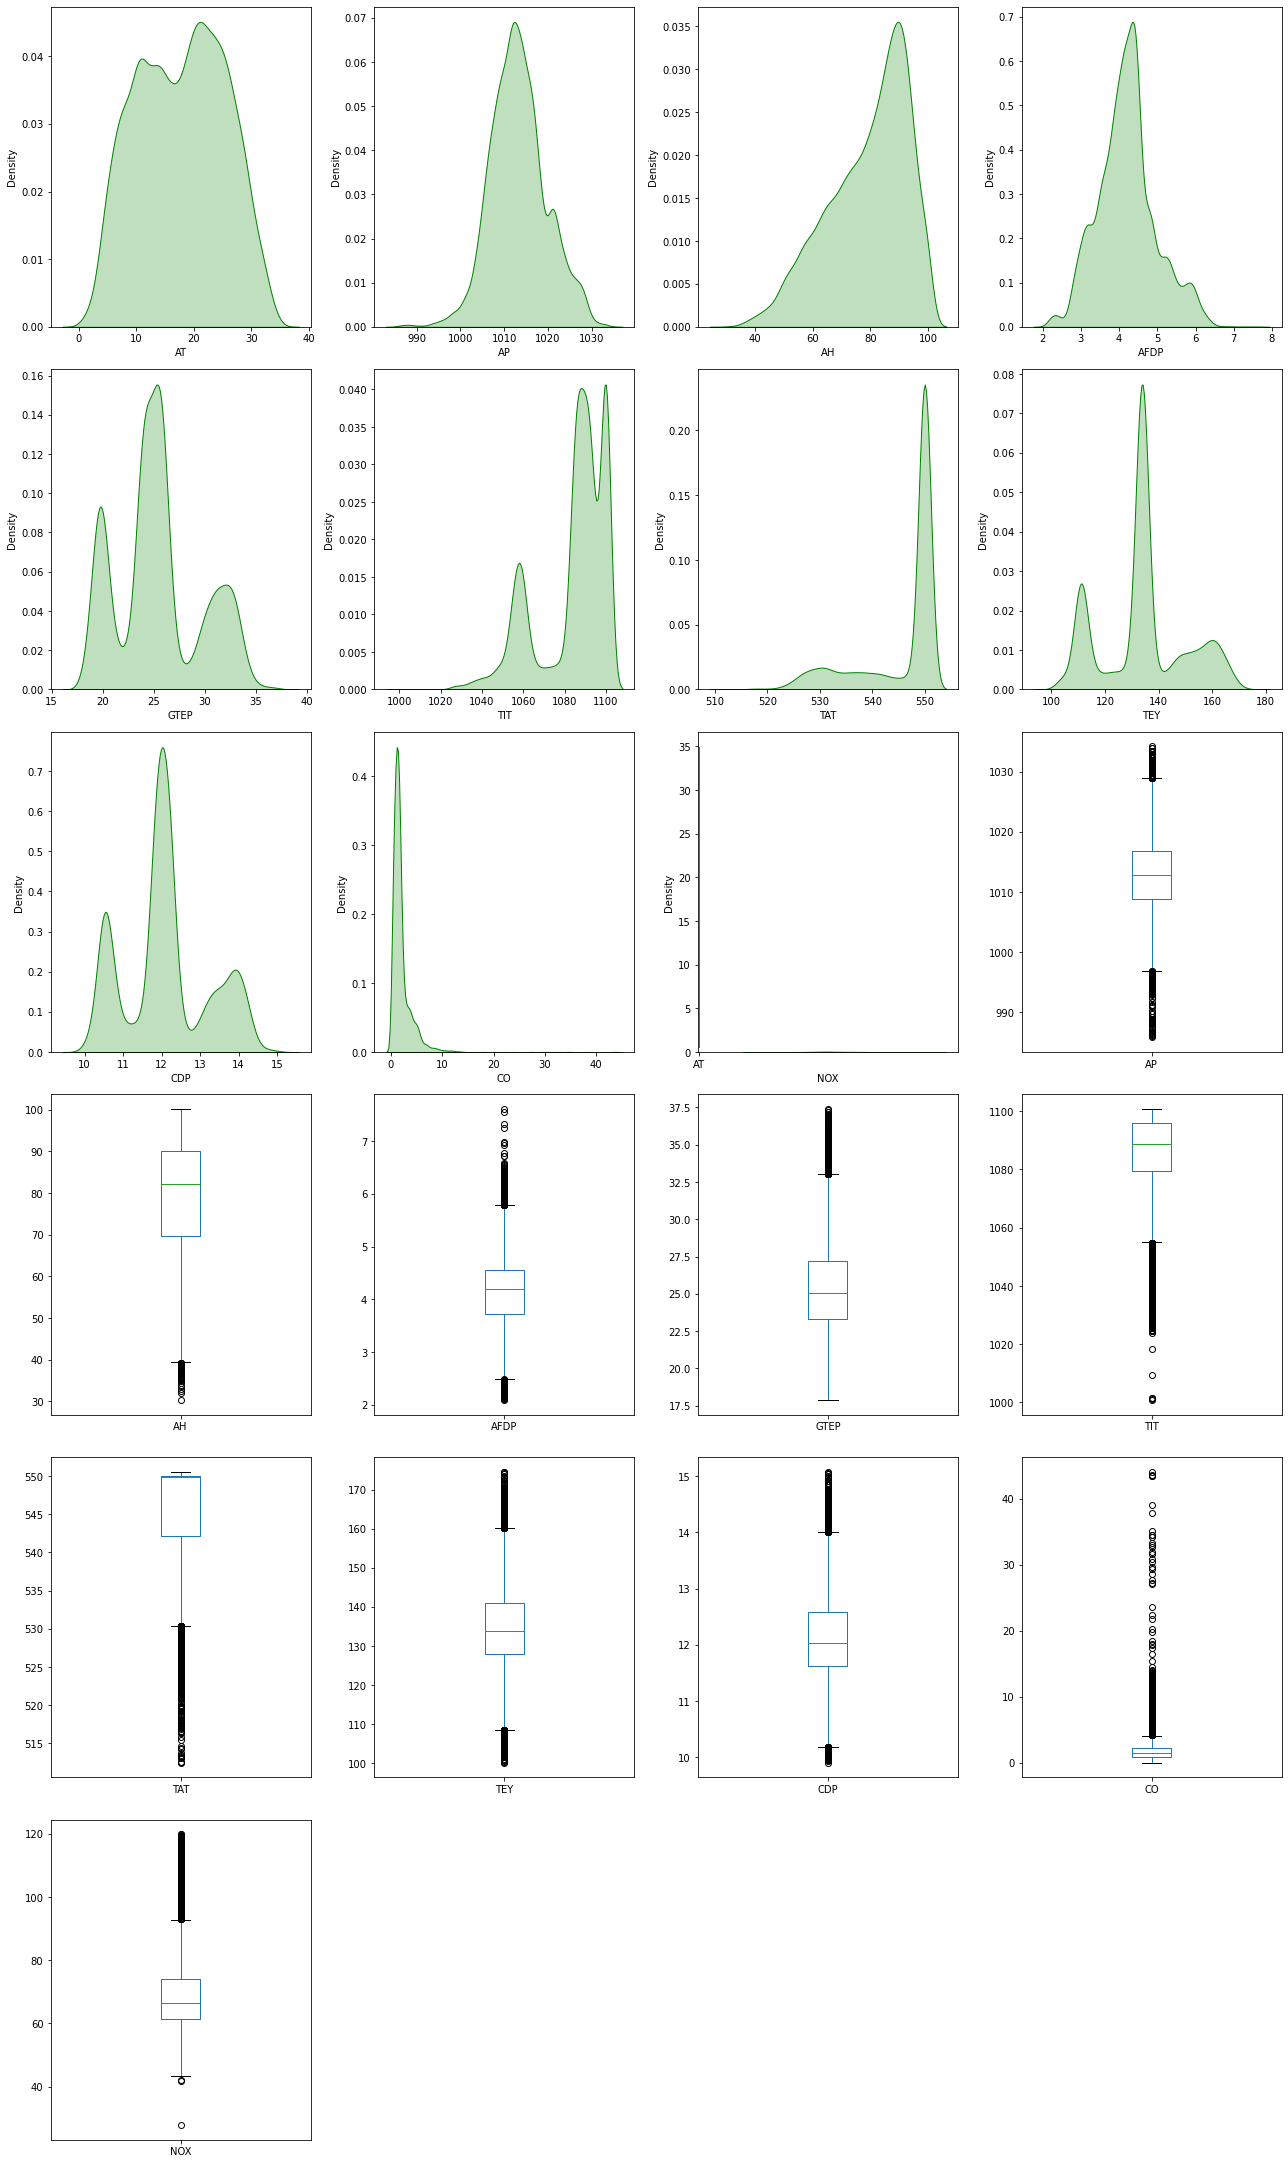

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [12]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gas[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    gas[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = gas[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [6]:
x = gas.drop(labels='TEY',axis=1)
y = gas['TEY']

In [7]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [8]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
scaled_x = stdsclr.fit_transform(x)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [11]:
ann = models.Sequential([
      layers.Dense(20,input_dim=10,activation = 'relu'),
      layers.Dense(40,activation = 'relu'),
      layers.Dense(1,activation = 'linear')
    
])

In [12]:
ann.compile(optimizer='adam',loss='mse',metrics=["mse","mae"])

In [13]:
ann.fit(x,y,batch_size=100,epochs=300)

Epoch 1/300
151/151 [==============================] - 1s 1ms/step - loss: 1354.8832 - mse: 1354.8832 - mae: 20.6330
Epoch 2/300
151/151 [==============================] - 0s 1ms/step - loss: 179.3921 - mse: 179.3921 - mae: 10.1091
Epoch 3/300
151/151 [==============================] - 0s 1ms/step - loss: 170.8746 - mse: 170.8746 - mae: 9.8986
Epoch 4/300
151/151 [==============================] - 0s 1ms/step - loss: 162.5738 - mse: 162.5738 - mae: 9.6701
Epoch 5/300
151/151 [==============================] - 0s 1ms/step - loss: 152.7234 - mse: 152.7234 - mae: 9.3726
Epoch 6/300
151/151 [==============================] - 0s 1ms/step - loss: 142.3651 - mse: 142.3651 - mae: 9.0726
Epoch 7/300
151/151 [==============================] - 0s 1ms/step - loss: 129.8925 - mse: 129.8925 - mae: 8.6727
Epoch 8/300
151/151 [==============================] - 0s 1ms/step - loss: 117.1606 - mse: 117.1606 - mae: 8.2461
Epoch 9/300
151/151 [==============================] - 0s 1ms/step - loss: 102.8875 

151/151 [==============================] - 0s 2ms/step - loss: 1.4408 - mse: 1.4408 - mae: 0.9358
Epoch 148/300
151/151 [==============================] - 0s 2ms/step - loss: 1.3328 - mse: 1.3328 - mae: 0.8956
Epoch 149/300
151/151 [==============================] - 0s 1ms/step - loss: 1.2817 - mse: 1.2817 - mae: 0.8718
Epoch 150/300
151/151 [==============================] - 0s 1ms/step - loss: 1.3638 - mse: 1.3638 - mae: 0.9048
Epoch 151/300
151/151 [==============================] - 0s 1ms/step - loss: 1.3272 - mse: 1.3272 - mae: 0.8937
Epoch 152/300
151/151 [==============================] - 1s 4ms/step - loss: 1.3318 - mse: 1.3318 - mae: 0.8899
Epoch 153/300
151/151 [==============================] - 0s 2ms/step - loss: 1.3126 - mse: 1.3126 - mae: 0.8835
Epoch 154/300
151/151 [==============================] - 0s 2ms/step - loss: 1.5091 - mse: 1.5091 - mae: 0.9571
Epoch 155/300
151/151 [==============================] - 0s 1ms/step - loss: 1.2440 - mse: 1.2440 - mae: 0.8589
Epoch 

151/151 [==============================] - 0s 2ms/step - loss: 0.9183 - mse: 0.9183 - mae: 0.7300
Epoch 294/300
151/151 [==============================] - 0s 2ms/step - loss: 1.0591 - mse: 1.0591 - mae: 0.7887
Epoch 295/300
151/151 [==============================] - 0s 2ms/step - loss: 0.9064 - mse: 0.9064 - mae: 0.7214
Epoch 296/300
151/151 [==============================] - 0s 1ms/step - loss: 1.1480 - mse: 1.1480 - mae: 0.8257
Epoch 297/300
151/151 [==============================] - 0s 2ms/step - loss: 0.8574 - mse: 0.8574 - mae: 0.6988
Epoch 298/300
151/151 [==============================] - 0s 1ms/step - loss: 0.8004 - mse: 0.8004 - mae: 0.6682
Epoch 299/300
151/151 [==============================] - 0s 1ms/step - loss: 0.8125 - mse: 0.8125 - mae: 0.6758
Epoch 300/300
151/151 [==============================] - 0s 1ms/step - loss: 0.8967 - mse: 0.8967 - mae: 0.7163


In [14]:
ann.evaluate(x,y)

470/470 [==============================] - 1s 915us/step - loss: 1.8197 - mse: 1.8197 - mae: 1.1518


[1.8196922540664673, 1.8196922540664673, 1.1518267393112183]